In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 1.Download the Dataset and Understand the Format (10 Points)

# 2.Generate the Data Matrix and the Label vector (10 Points)

In [ ]:
path = os.path.abspath(os.curdir)
path

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_features = []
y_labels = []

folder_path = path + '/drive/MyDrive' + '/pca_lda_dataset'

def import_data(folder_path):
    for i in tqdm(os.listdir(folder_path)) :
        class_path = folder_path + '/' + i
        for j in os.listdir(class_path) :
            img = plt.imread(os.path.join(class_path, j))
            x_features.append(img)
            y_labels.append(i)
    return x_features, y_labels
        
    
x_features, y_labels = import_data(folder_path)

100%|██████████| 40/40 [01:08<00:00,  1.71s/it]


In [ ]:
x_features[0]

array([[52, 47, 51, ..., 45, 48, 45],
       [52, 50, 53, ..., 46, 46, 47],
       [55, 44, 58, ..., 45, 48, 44],
       ...,
       [67, 68, 73, ..., 44, 35, 46],
       [72, 62, 68, ..., 35, 39, 49],
       [73, 68, 63, ..., 30, 34, 42]], dtype=uint8)

s37


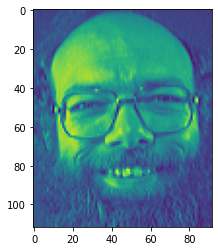

In [ ]:
plt.imshow(x_features[9])
print(y_labels[9])

In [ ]:
x_features[0].shape

(112, 92)

In [ ]:
type(x_features[0])

numpy.ndarray

In [ ]:
z = x_features[0].reshape(-1)
z

array([52, 47, 51, ..., 30, 34, 42], dtype=uint8)

### a.Convert every image into a vector of 10304 values corresponding to the image size.
### b.Stack the 400 vectorsinto a single Data Matrix D and generate the label vector y.The labels are integers from 1:40 corresponding to the subject id.

In [ ]:
def flatten_images(x_features):
    for i in range(len(x_features)) :
        x_features[i] = x_features[i].reshape(-1) # we can use .ravel() also
    return x_features

x_features = flatten_images(x_features)

In [ ]:
x_features[0].shape

(10304,)

In [ ]:
len(x_features)

400

## 3.Split the Dataset into Training and Test sets (10 Points)
### a.From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. 
### This will give you 5 instances per person for training and 5 instancesper person for testing.
### b.Split the labels vector accordingly.

In [ ]:
def encode_labels(y_labels):
    le = LabelEncoder()
    y_label_coded = le.fit_transform(y_labels)
    return y_label_coded, le
    
y_label_coded, le = encode_labels(y_labels)
y_label_coded

array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 23,
       23, 23, 23, 23, 23

In [ ]:
def split_data_even_odd(x_features, y_label_coded):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(len(x_features)) :
        if i % 2 == 0 :
            x_train.append(x_features[i])
            y_train.append(y_label_coded[i])
        else :
            x_test.append(x_features[i])
            y_test.append(y_label_coded[i])
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data_even_odd(x_features, y_label_coded)

In [ ]:
len(x_train)
print(x_train[0] == x_features[0])
print(x_train[60] == x_features[120])
print(y_train[0] == y_label_coded[0])
print(y_train[60] == y_label_coded[120])

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
True
True


# 4.Classification using PCA(30 points)
### a.Use the pseudo code below for computing the projection matrix U. Define thealpha= {0.8,0.85,0.9,0.95}
### b.Project the training set, andtest sets separately using the same projection matrix.

In [ ]:
def get_eigens_and_meanVector(x_train): #must be numpy matrix
    #compute mean
    mean_vector = x_train.mean(axis = 1)
    #center_data
    x_train_cen = x_train - mean_vector
    #compute covariance
    cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
    #compute eigen vals and eigen vec
    eig_val, eig_vec = np.linalg.eigh(cov)
    return eig_val, eig_vec, mean_vector

In [ ]:
def get_proj_mat(eig_val, eig_vec, alpha):
    #fraction of total variance
    fraction = []
    eig_sum=0
    eig_val_rev = eig_val[::-1]
    eig_vec_rev = eig_vec[::-1]

    for i in eig_val_rev :
        eig_sum += i
        fraction.append(eig_sum/eig_val_rev.sum())
    fraction = np.array(fraction)
    #choose dimensionality
    fraction_trimed = fraction > alpha
    smallest_ind = 0
    for i in range(len(fraction_trimed)) :
        if fraction_trimed[i] == True :
            smallest_ind = i
            break;
    #reduced basis
    proj_mat = eig_vec_rev[:smallest_ind+1]
    return proj_mat

In [ ]:
def center_data(x_train, x_test, mean_vector):
    return x_train-mean_vector, x_test-mean_vector

In [ ]:
def get_projected_mat(x_train, x_test, proj_mat):
    x_train_proj = np.dot(x_train, proj_mat.T)
    #x_test_cen = x_test- x_train_proj.mean(axis=1)
    x_test_proj = np.dot(x_test, proj_mat.T)
    return x_train_proj, x_test_proj

### c.Use a simple classifier (first Nearest Neighbor to determine the class labels).
### d.Report Accuracy for every value of alpha separately.

In [ ]:
def classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors=1):
    knn = KNN(n_neighbors = neighbors)
    knn.fit(x_train_proj, y_train)
    y_pred = knn.predict(x_test_proj)
    print("accuracy of alpha",alpha,"and neighbours =", neighbors,"is", accuracy_score(y_pred, y_test))
    print("precision of alpha",alpha,"and neighbours =", neighbors,"is", precision_score(y_pred, y_test, average = 'weighted'))
    print("recall of alpha",alpha,"and neighbours =", neighbors,"is", recall_score(y_pred, y_test, average = 'weighted'))
    print("f1 score of alpha",alpha,"and neighbours =", neighbors,"is", f1_score(y_pred, y_test, average = 'weighted'))

In [ ]:
x_train = np.matrix(x_train)
x_test = np.matrix(x_test)
y_train = np.array(y_train).reshape(200,1)
y_test = np.array(y_test).reshape(200,1)
eig_val, eig_vac, mean_vector = get_eigens_and_meanVector(x_train)

In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
for alpha in alphas:
    proj_mat = get_proj_mat(eig_val, eig_vec, alpha)
    #x_train_cen, x_test_cen = center_data(x_train, x_test, mean_vector)
    x_train_proj, x_test_proj = get_projected_mat(x_train, x_test, proj_mat)
    classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors = 1)
    print("________________________________________________________")
    

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

accuracy of alpha 0.8 and neighbours = 1 is 0.705
precision of alpha 0.8 and neighbours = 1 is 0.76
recall of alpha 0.8 and neighbours = 1 is 0.705
f1 score of alpha 0.8 and neighbours = 1 is 0.7109758991008991
________________________________________________________
accuracy of alpha 0.85 and neighbours = 1 is 0.785
precision of alpha 0.85 and neighbours = 1 is 0.8340000000000001
recall of alpha 0.85 and neighbours = 1 is 0.785
f1 score of alpha 0.85 and neighbours = 1 is 0.7848490982701509
________________________________________________________
accuracy of alpha 0.9 and neighbours = 1 is 0.86
precision of alpha 0.9 and neighbours = 1 is 0.8959999999999999
recall of alpha 0.9 and neighbours = 1 is 0.86
f1 score of alpha 0.9 and neighbours = 1 is 0.8629725135975136
________________________________________________________
accuracy of alpha 0.95 and neighbours = 1 is 0.895
precision of alpha 0.95 and neighbours = 1 is 0.9279999999999999
recall of alpha 0.95 and neighbours = 1 is 0.895
f

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### e.Can you find a relation between alpha and classification accuracy?

### From the results it's obvious that by increasing the alpha the accuracy of the model increases
#### This happens because the percentage of data loss from our data decrease so the accuracy of the model increases
#### i.e. when increasing the alpha the new dims (eigen vectors) become more and more representative for the data

# 5. Classification Using LDA (30 Points)

---




## 1. Use the pseudo code below for LDA. 

In [ ]:
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
uniqueClasses = np.unique(y_train)
print(uniqueClasses)
print(x_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[[ 52  47  51 ...  30  34  42]
 [ 55  47  50 ...  48  46  72]
 [121 122 121 ... 141 140 145]
 ...
 [111 110 111 ...  35  40  29]
 [105 104 104 ...  43  41  24]
 [100 105 103 ...  41  37  37]]


Calculate the mean vector for every class Mu1,Mu2,...,Mu40.

In [ ]:
meanVectors = []
eachClassIndices = []
for i in range(len(uniqueClasses)):
  indices = np.where(y_train == uniqueClasses[i])
  array = np.asarray(x_train[indices[0], :])
  meanVectors.append(np.mean(array, axis=0))
  eachClassIndices.append( indices[0])

meanVectors = np.asarray(meanVectors)
print(meanVectors.shape)

(40, 10304)




Calculate the mean vector for every class Mu1, Mu2, ..., Mu40.

In [ ]:
overAllMean = np.mean(x_train, axis=0)
print(overAllMean)
print(overAllMean.shape)

[87.31  87.23  87.795 ... 76.885 75.07  75.045]
(10304,)


Replace $ \ B $ matrix by $ \ S_{b} $.
   
   $$ \ S_{b} = \sum_{k=1}^{m}n_k (\mu_k - \mu)(\mu_k-\mu)^T $$

Here, m is the number of classes, μ is the overall sample mean, and $\ n_{k} $ is the
number of samples in the k-th class.


In [ ]:
sb = np.zeros([10304,10304])
nk = len(eachClassIndices[0])
for i in range(len(uniqueClasses)):
  centered = np.asmatrix(meanVectors[i] - overAllMean)
  sb += (nk * np.matmul(centered.T , centered) ) 

print(sb)

[[224669.18  222145.54  219306.31  ... -17007.27  -11703.54   -5150.79 ]
 [222145.54  220367.82  217184.23  ... -17471.11  -12621.02   -6197.87 ]
 [219306.31  217184.23  214637.795 ... -16600.915 -11336.73   -5078.955]
 ...
 [-17007.27  -17471.11  -16600.915 ... 319327.155 292212.01  289138.235]
 [-11703.54  -12621.02  -11336.73  ... 292212.01  274046.62  271223.57 ]
 [ -5150.79   -6197.87   -5078.955 ... 289138.235 271223.57  275195.795]]


Calculating $ \ S $ matrix

In [ ]:
s = np.zeros([10304,10304])
for j in range(len(eachClassIndices)):
  D = np.asarray(x_train[eachClassIndices[j], :])
  z = np.asarray(D) - meanVectors[j]
  s += np.matmul(z.T , z)

print(s)

[[ 24315.6  24838.2  25425.4 ...   2324.4   5223.2   7075. ]
 [ 24838.2  28065.6  27140.2 ...   2072.4   5211.8   7516.8]
 [ 25425.4  27140.2  28428.8 ...   1089.2   5066.6   7084.8]
 ...
 [  2324.4   2072.4   1089.2 ... 103697.2  79942.6  69799.8]
 [  5223.2   5211.8   5066.6 ...  79942.6  95566.4  85396.8]
 [  7075.    7516.8   7084.8 ...  69799.8  85396.8  98088.8]]


Calculating $ \  S^{-1} $

In [ ]:
s = np.asmatrix(s)
sInv = np.linalg.inv(s)

Calculating eignValues and eignVectors $  of \ S^{-1} B $

In [ ]:
eignValues, eignVectors = np.linalg.eigh(np.matmul(sInv, sb))

### save eignvalues and eignvectors

In [ ]:
print(eignValues)
print("**************")
print(eignVectors)

[-1.10474660e+20 -4.55973957e+19 -2.72518116e+19 ...  2.69745546e+19
  4.53785035e+19  1.11098921e+20]
**************
[[-0.01611369 -0.01708421  0.0138483  ... -0.01368755  0.01664375
  -0.01623991]
 [-0.01645296 -0.01736652  0.01400183 ... -0.01417998  0.01716497
  -0.0166809 ]
 [-0.0158041  -0.01681347  0.01368257 ... -0.01325374  0.01618776
  -0.01585036]
 ...
 [-0.01374197  0.01422815  0.01862655 ...  0.01805236  0.0141774
   0.01339777]
 [-0.01441934  0.01555746  0.01939632 ...  0.01864187  0.01558169
   0.01404437]
 [-0.01469846  0.01556081  0.01803535 ...  0.01740388  0.01547482
   0.01435167]]


In [ ]:
kval = eignValues
kvec = eignVectors

In [ ]:
eignValues = kval
eignVectors = kvec
print(eignVectors[0])

[[-0.01611369 -0.01708421  0.0138483  ... -0.01368755  0.01664375
  -0.01623991]]


### Continue 
Use 39 dominant eigenvectors instead of just one. You will have a projection matrix  $ \ U_{39x10304} $


Sorting Eigen vectors based on Eigen values

In [ ]:
idx = np.asmatrix(eignValues.argsort())
idx = np.flip(idx)

eignValues = eignValues[idx]
eignVectors = eignVectors[idx,:].reshape(10304, 10304).T
# print(eignValues)
# print(eignVectors)

Get The projection matrix using the 39 dominant eigen vectors

In [ ]:
projectionMatrix  = np.asmatrix(eignVectors[0:39,:])
print(projectionMatrix)

[[-0.01469846 -0.01441934 -0.01374197 ... -0.0158041  -0.01645296
  -0.01611369]
 [ 0.01556081  0.01555746  0.01422815 ... -0.01681347 -0.01736652
  -0.01708421]
 [ 0.01803535  0.01939632  0.01862655 ...  0.01368257  0.01400183
   0.0138483 ]
 ...
 [-0.05081592 -0.06618708 -0.05264023 ... -0.00192669 -0.00150035
  -0.00162186]
 [ 0.00783399  0.00431286  0.00778132 ...  0.04285225  0.03392487
   0.03962563]
 [ 0.02046168  0.0220529   0.01900019 ... -0.02172891 -0.01723565
  -0.02009241]]


## 2. Projection
Project the training set, and test sets separately using the same projection matrix U. You will have 39 dimensions in the new space.


In [ ]:
print(projectionMatrix.shape)
print(x_train.shape)
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
print(x_trainProj.shape)

(39, 10304)
(200, 10304)
(200, 39)


## 3. Use a simple classifier 
(first Nearest Neighbor to determine the class
labels).


In [ ]:
neighbours = [1,3,5,7]
def LDATuning():
  for i in neighbours:
    knn = KNN(n_neighbors = i)
    knn.fit(np.asarray(x_trainProj), y_train.ravel())
    y_pred = knn.predict(np.asarray(x_testProj))
    print(accuracy_score(y_pred, y_test.ravel()))

In [ ]:
LDATuning()

0.91
0.85
0.765
0.675


# Draft

In [ ]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)
# compute the mean
mean1 = x_train[0].mean()
mean1

128.33821816770185

In [ ]:
mean = x_train.mean(axis = 1)

In [ ]:
x_train

matrix([[ 48,  49,  45, ...,  47,  46,  46],
        [ 60,  60,  62, ...,  32,  34,  34],
        [ 63,  53,  35, ...,  41,  10,  24],
        ...,
        [114, 110, 112, ...,  93,  89,  86],
        [113, 112, 111, ...,  87,  87,  89],
        [111, 114, 112, ...,  88,  86,  92]], dtype=uint8)

In [ ]:
x_train_cen = x_train - mean
x_train_cen

matrix([[ -80.33821817,  -79.33821817,  -83.33821817, ...,  -81.33821817,
          -82.33821817,  -82.33821817],
        [ -87.98893634,  -87.98893634,  -85.98893634, ..., -115.98893634,
         -113.98893634, -113.98893634],
        [ -79.14926242,  -89.14926242, -107.14926242, ..., -101.14926242,
         -132.14926242, -118.14926242],
        ...,
        [  -0.15130047,   -4.15130047,   -2.15130047, ...,  -21.15130047,
          -25.15130047,  -28.15130047],
        [  -1.60461957,   -2.60461957,   -3.60461957, ...,  -27.60461957,
          -27.60461957,  -25.60461957],
        [  -5.30619177,   -2.30619177,   -4.30619177, ...,  -28.30619177,
          -30.30619177,  -24.30619177]])

In [ ]:
cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
cov

matrix([[1976.34805901, 1960.26574729, 1969.31129174, ..., 1037.08246264,
         1181.18927893, 1310.84550078],
        [1960.26574729, 1959.59343556, 1962.30398001, ..., 1057.75015092,
         1204.7469672 , 1326.33818906],
        [1969.31129174, 1962.30398001, 1979.05952446, ..., 1048.89569537,
         1203.27251165, 1330.21373351],
        ...,
        [1037.08246264, 1057.75015092, 1048.89569537, ..., 4275.79686627,
         3921.82368256, 3816.33490441],
        [1181.18927893, 1204.7469672 , 1203.27251165, ..., 3921.82368256,
         3962.76549884, 3880.1317207 ],
        [1310.84550078, 1326.33818906, 1330.21373351, ..., 3816.33490441,
         3880.1317207 , 3979.69794255]])

In [ ]:
cov.shape

(10304, 10304)

In [ ]:
eig_val, eig_vec = np.linalg.eigh(cov)
eig_val

array([-1.47865309e-09, -9.67008802e-10, -9.39322865e-10, ...,
        1.09462153e+06,  2.49586831e+06,  1.03243713e+07])

In [ ]:
eig_vec

matrix([[ 4.40999566e-13,  0.00000000e+00,  0.00000000e+00, ...,
         -2.02077162e-02, -1.26709374e-02,  8.58581305e-03],
        [ 2.39118447e-01, -1.18850190e-01,  2.50816148e-01, ...,
         -2.01693608e-02, -1.26069511e-02,  8.63548751e-03],
        [-2.73098009e-01,  2.33758767e-01, -8.76188788e-02, ...,
         -2.03500603e-02, -1.28602767e-02,  8.54150292e-03],
        ...,
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02]])

In [ ]:
fraction = []
eig_sum=0
eig_val_rev = eig_val[::-1]
eig_vec_rev = eig_vec[::-1]

for i in eig_val_rev :
    eig_sum += i
    fraction.append(eig_sum/eig_val_rev.sum())

In [ ]:
len(fraction)

10304

In [ ]:
fraction[10303]

1.0000000000000007

In [ ]:
fraction = np.array(fraction)
print(fraction)

[0.43845898 0.54445437 0.59094114 ... 1.         1.         1.        ]


In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]

fraction_trimed = fraction > alpha[0]
fraction_trimed

array([False, False, False, ...,  True,  True,  True])

In [ ]:
smallest_ind = 0

for i in range(len(fraction_trimed)) :
    if fraction_trimed[i] == True :
        smallest_ind = i
        break;

smallest_ind

18

In [ ]:
proj_mat = eig_vec_rev[:smallest_ind+1]
proj_mat

matrix([[-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        ...,
        [ 5.02321565e-03, -7.07822858e-03, -1.24872236e-03, ...,
          1.75339931e-02, -9.88204091e-03,  9.64316213e-03],
        [-3.49250542e-03, -9.80585753e-04,  6.38016881e-03, ...,
          1.79483112e-02, -8.50801606e-03,  9.31191296e-03],
        [ 4.26091060e-03, -2.86357337e-03, -5.19720200e-03, ...,
          1.34014312e-02, -7.67041412e-03,  9.26949872e-03]])

In [ ]:
proj_mat.shape

(19, 10304)

In [ ]:
x_train_proj = np.dot(x_train, proj_mat.T)
x_test_proj = np.dot(x_test, proj_mat.T)
x_train_proj.shape
x_test_proj.shape

(200, 19)

In [ ]:
y_test = np.array(y_test)
y_train = y_train.reshape(200,1)
y_test = y_test.reshape(200,1)

In [ ]:
knn = KNN(n_neighbors = 1)
knn.fit(x_train_proj, y_train)
y_pred = knn.predict(x_test_proj)
print("accuracy of alpha  = 0.8 and neighbours = 10 is", accuracy_score(y_pred, y_test))

accuracy of alpha  = 0.8 and neighbours = 10 is 0.705


C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

# 7. Compare vs Non-Face Images (15 Points)

---



## Download non-face images and make them of the same size 92x112

In [ ]:
from PIL import Image
new_width = 92
new_height = 112
non_face_features = []

non_face_images_path = path + '/drive/MyDrive' + '/non-face_images'

def import_non_face_images_resized(non_face_images_path):
    for i in tqdm(os.listdir(non_face_images_path)) :
        class_path = non_face_images_path + '/' + i
        for j in os.listdir(class_path) :
            image_path = os.path.join(class_path, j)            
            # image = Image.open(image_path).convert('L')
            # resized_image = image.resize((new_width, new_height))
            # resized_image.save(image_path)
            img = plt.imread(image_path)
            non_face_features.append(img)
    return non_face_features
        
    
non_face_features = import_non_face_images_resized(non_face_images_path)
# reshape the images to be of size 10304
non_face_features = flatten_images(non_face_features[:100])
non_face_features = np.asarray(non_face_features)

100%|██████████| 7/7 [01:57<00:00, 16.80s/it]


In [ ]:
# Join the faces with the non faces images into one array
def join_faces_with_non_faces(number_of_non_face_images):
    D = np.concatenate((np.array(non_face_features[ : number_of_non_face_images, :]), x_features), axis = 0)
    D_labels = np.concatenate((np.zeros((number_of_non_face_images, 1)), np.ones((400, 1))), axis=0)
    return D, D_labels

In [ ]:
def convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test):
    D_train = np.asarray(D_train)
    D_labels_train = np.asarray(D_labels_train)
    D_test = np.asarray(D_test)
    D_labels_test = np.asarray(D_labels_test)
    new_unique_classes = np.unique(D_labels_train)
    return D_train, D_labels_train, D_test, D_labels_test, new_unique_classes

In [ ]:
def find_mean_vector(D_train, D_labels_train, new_unique_classes):
    new_mean_vectors = []
    new_each_class_indices = []
    for i in range(len(new_unique_classes)):
        indices = np.where(D_labels_train == new_unique_classes[i])
        array = np.asarray(D_train[indices[0], :])
        new_mean_vectors.append(np.mean(array, axis=0))
        new_each_class_indices.append( indices[0])
    new_mean_vectors = np.asarray(new_mean_vectors)
    return new_mean_vectors, new_each_class_indices

In [ ]:
def calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean):
    new_sb = np.zeros([10304,10304])
    new_nk = len(new_each_class_indices[0])
    for i in range(len(new_unique_classes)):
        centered = np.asmatrix(new_mean_vectors[i] - new_over_all_mean)
        new_sb += (new_nk * np.matmul(centered.T , centered) )
    new_s = np.zeros([10304,10304])
    for j in range(len(new_each_class_indices)):
        D_temp = np.asarray(D_train[new_each_class_indices[j], :])
        z = np.asarray(D_temp) - new_mean_vectors[j]
        new_s += np.matmul(z.T , z)
    new_s = np.asmatrix(new_s)
    new_sInv = np.linalg.inv(new_s)
    new_eignValues, new_eignVectors = np.linalg.eigh(np.matmul(new_sInv, new_sb))
    new_idx = np.asmatrix(new_eignValues.argsort())
    new_idx = np.flip(new_idx)

    new_eignValues = new_eignValues[new_idx]
    new_eignVectors = new_eignVectors[new_idx,:].reshape(10304, 10304).T
    return new_eignVectors

In [ ]:
new_neighbours = [1,3,5,7]
def new_LDATuning(D_train, D_test, index_of_last_dominant_eigen_vector, new_eignVectors):
    new_projectionMatrix  = np.asmatrix(new_eignVectors[0:index_of_last_dominant_eigen_vector,:])
    D_trainProj = np.matmul(new_projectionMatrix, D_train.T).T
    D_testProj = np.matmul(new_projectionMatrix, D_test.T).T
    knn = KNN(n_neighbors = 1)
    knn.fit(np.asarray(D_trainProj), D_labels_train.ravel())
    D_labels_pred = knn.predict(np.asarray(D_testProj))
    accuracy = accuracy_score(D_labels_pred, D_labels_test.ravel())
    precision = precision_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    recall = recall_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    f1 = f1_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    return accuracy, precision, recall, f1

In [ ]:
# Plot the accuracy vs the number of non-faces images while fixing the number of face images.
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in range(50, 401, 50):
    D, D_labels = join_faces_with_non_faces(i)
    # Split the data even and odd
    D_train, D_test, D_labels_train, D_labels_test = split_data_even_odd(D, D_labels)
    D_train, D_labels_train, D_test, D_labels_test, new_unique_classes = convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test)
    new_mean_vectors, new_each_class_indices = find_mean_vector(D_train, D_labels_train, new_unique_classes)
    new_over_all_mean = np.mean(D_train, axis=0)
    new_eignVectors = calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean)
    accuracy, precision, recall, f1 = new_LDATuning(D_train, D_test, 39, new_eignVectors)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print("Accuracy: ", accuracy)

Accuracy:  0.9422222222222222
Accuracy:  0.956
Accuracy:  0.952
Accuracy:  0.948
Accuracy:  0.936
Accuracy:  0.928
Accuracy:  0.928
Accuracy:  0.956


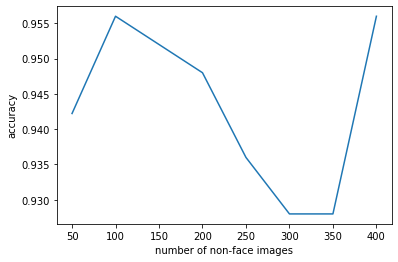

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), accuracy_list)
plt.xlabel('number of non-face images')
plt.ylabel('accuracy')
plt.show()

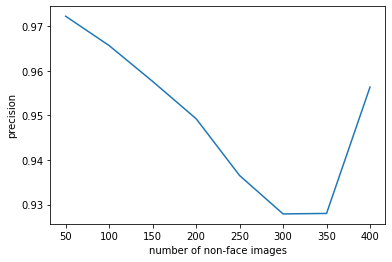

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), precision_list)
plt.xlabel('number of non-face images')
plt.ylabel('precision')
plt.show()

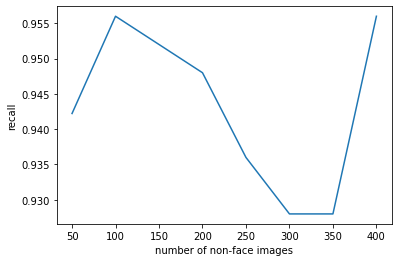

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), recall_list)
plt.xlabel('number of non-face images')
plt.ylabel('recall')
plt.show()

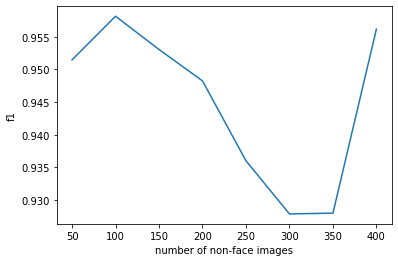

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), f1_list)
plt.xlabel('number of non-face images')
plt.ylabel('f1')
plt.show()

#  Criticize the accuracy measure for large numbers of non-faces images in the training data.

As we saw from the plot, the accuracy decreases when we increase the size of the non-face images whlile fixing the number of face images.

In [ ]:
# Use 39 dominant eigen vectors
D, D_labels = join_faces_with_non_faces(400)
# Split the data even and odd
D_train, D_test, D_labels_train, D_labels_test = split_data_even_odd(D, D_labels)
D_train, D_labels_train, D_test, D_labels_test, new_unique_classes = convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test)
new_mean_vectors, new_each_class_indices = find_mean_vector(D_train, D_labels_train, new_unique_classes)
new_over_all_mean = np.mean(D_train, axis=0)
new_eignVectors = calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean)
new_neighbours = [1,3,5,7]
new_projectionMatrix  = np.asmatrix(new_eignVectors[0:39,:])
D_trainProj = np.matmul(new_projectionMatrix, D_train.T).T
D_testProj = np.matmul(new_projectionMatrix, D_test.T).T
for i in new_neighbours:
    knn = KNN(n_neighbors = i)
    knn.fit(np.asarray(D_trainProj), D_labels_train.ravel())
    D_labels_pred = knn.predict(np.asarray(D_testProj))
    print("accuracy of neighbours =", i,"is", accuracy_score(D_labels_pred, D_labels_test.ravel()))
    print("precision of neighbours =", i,"is", precision_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    print("recall of neighbours =", i,"is", recall_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    print("f1 score of neighbours =", i,"is", f1_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    success_case_found, failure_case_found = False, False
    for i in range(len(D_testProj)):
        if success_case_found and failure_case_found:
            break
        if not success_case_found and D_labels_pred[i] == D_labels_test[i]:
            success_case_found = True
            print("Success case: ")
            print("Actual Classification:", D_labels_test[i])
            print("Pred Classification:", D_labels_pred[i])
        if not failure_case_found and D_labels_pred[i] != D_labels_test[i]:
                failure_case_found = True
                print("Failure case: ")
                print("Actual Classification:", D_labels_test[i])
                print("Pred Classification:", D_labels_pred[i])
    print('-' * 100)        

accuracy of neighbours = 1 is 0.956
precision of neighbours = 1 is 0.95638
recall of neighbours = 1 is 0.956
f1 score of neighbours = 1 is 0.9561673593793296
Success case: 
Actual Classification: [0.]
Pred Classification: 0.0
Failure case: 
Actual Classification: [0.]
Pred Classification: 1.0
----------------------------------------------------------------------------------------------------
accuracy of neighbours = 3 is 0.936
precision of neighbours = 3 is 0.93872
recall of neighbours = 3 is 0.936
f1 score of neighbours = 3 is 0.9370165016501648
Success case: 
Actual Classification: [0.]
Pred Classification: 0.0
Failure case: 
Actual Classification: [0.]
Pred Classification: 1.0
----------------------------------------------------------------------------------------------------
accuracy of neighbours = 5 is 0.928
precision of neighbours = 5 is 0.93304
recall of neighbours = 5 is 0.928
f1 score of neighbours = 5 is 0.929765852635992
Success case: 
Actual Classification: [0.]
Pred Class